In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.utils as ku 
import numpy as np 
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

#Data Collection

In [27]:
# create vocabulary for training

chars = ['\n', 'a', 'b', 'c', 'ç', 'd', 'e', 'ə', 'f', 'g', 'ğ', 'h', 'x', 'ı',
        'i', 'j', 'k', 'q', 'l', 'm', 'n', 'o', 'ö', 'p', 'r', 's', 'ş', 't', 'u', 'ü', 'v', 'y', 'z' ]
chars = sorted(chars)
print(chars)

['\n', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', 'z', 'ç', 'ö', 'ü', 'ğ', 'ı', 'ş', 'ə']


In [28]:
vocab_size = len(chars)
vocab_size

33

In [29]:
# create mapping between letters and their indexes

char_to_ix = { ch:i for i,ch in enumerate(sorted(chars)) }
ix_to_char = { i:ch for i,ch in enumerate(sorted(chars)) }

In [30]:
ix_to_char

{0: '\n',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'x',
 24: 'y',
 25: 'z',
 26: 'ç',
 27: 'ö',
 28: 'ü',
 29: 'ğ',
 30: 'ı',
 31: 'ş',
 32: 'ə'}

In [31]:
with open('male_names.txt', 'r') as f:
    m_names = f.read()
m_names = m_names.split('\n')
m_names[:10]

['aba',
 'ababəy',
 'abaçı',
 'abaxan',
 'abakar',
 'abakər',
 'abaqa',
 'abas',
 'abasağa',
 'abasalı']

In [32]:
# add \n to the end of each word to let know model when the word ends
male_names = []

for i in m_names:
  male_names.append(i + '\n')
male_names[:10]

['aba\n',
 'ababəy\n',
 'abaçı\n',
 'abaxan\n',
 'abakar\n',
 'abakər\n',
 'abaqa\n',
 'abas\n',
 'abasağa\n',
 'abasalı\n']

In [33]:
# convert letters to numbers
male_names_indexed = []

for i in male_names:
    male_names_indexed.append([char_to_ix[j] for j in i])

male_names_indexed[:9]

[[1, 2, 1, 0],
 [1, 2, 1, 2, 32, 24, 0],
 [1, 2, 1, 26, 30, 0],
 [1, 2, 1, 23, 1, 14, 0],
 [1, 2, 1, 11, 1, 18, 0],
 [1, 2, 1, 11, 32, 18, 0],
 [1, 2, 1, 17, 1, 0],
 [1, 2, 1, 19, 0],
 [1, 2, 1, 19, 1, 29, 1, 0]]

In [34]:
# in order to have more training data and better model we will look at each part of the word as a seperate sequence  
input_m_names = []

for word in male_names_indexed:
	for i in range(1, len(word)):
		sequence = word[:i+1]
		input_m_names.append(sequence)

input_m_names[:9]

[[1, 2],
 [1, 2, 1],
 [1, 2, 1, 0],
 [1, 2],
 [1, 2, 1],
 [1, 2, 1, 2],
 [1, 2, 1, 2, 32],
 [1, 2, 1, 2, 32, 24],
 [1, 2, 1, 2, 32, 24, 0]]

In [35]:
# we need to find max length of the words to use in padding
max_m_name_len = max([len(x) for x in input_m_names])
max_m_name_len

14

In [36]:
# we will pad each word to have equal shape in dataset
input_m_names = np.array(pad_sequences(input_m_names, maxlen=max_m_name_len, padding='pre'))
input_m_names

array([[ 0,  0,  0, ...,  0,  1,  2],
       [ 0,  0,  0, ...,  1,  2,  1],
       [ 0,  0,  0, ...,  2,  1,  0],
       ...,
       [ 0,  0,  0, ..., 28, 18,  1],
       [ 0,  0,  0, ..., 18,  1,  2],
       [ 0,  0,  0, ...,  1,  2,  0]], dtype=int32)

#Apply Everything to Female Names

In [37]:
with open('female_names.txt', 'r') as f:
    f_names = f.read()
f_names = f_names.split('\n')
f_names[:10]

['ababil',
 'abadət',
 'abagül',
 'abaqay',
 'abayət',
 'abdəst',
 'abgül',
 'abhava',
 'abhəyat',
 'abxanım']

In [38]:
female_names = []
for i in f_names:
  female_names.append(i + '\n')
female_names[:10]

['ababil\n',
 'abadət\n',
 'abagül\n',
 'abaqay\n',
 'abayət\n',
 'abdəst\n',
 'abgül\n',
 'abhava\n',
 'abhəyat\n',
 'abxanım\n']

In [39]:
female_names_indexed = []

for i in female_names:
    female_names_indexed.append([char_to_ix[j] for j in i])

female_names_indexed[:9]

[[1, 2, 1, 2, 9, 12, 0],
 [1, 2, 1, 4, 32, 20, 0],
 [1, 2, 1, 7, 28, 12, 0],
 [1, 2, 1, 17, 1, 24, 0],
 [1, 2, 1, 24, 32, 20, 0],
 [1, 2, 4, 32, 19, 20, 0],
 [1, 2, 7, 28, 12, 0],
 [1, 2, 8, 1, 22, 1, 0],
 [1, 2, 8, 32, 24, 1, 20, 0]]

In [40]:
input_f_names = []

for word in female_names_indexed:
	for i in range(1, len(word)):
		sequence = word[:i+1]
		input_f_names.append(sequence)

input_f_names[:9]

[[1, 2],
 [1, 2, 1],
 [1, 2, 1, 2],
 [1, 2, 1, 2, 9],
 [1, 2, 1, 2, 9, 12],
 [1, 2, 1, 2, 9, 12, 0],
 [1, 2],
 [1, 2, 1],
 [1, 2, 1, 4]]

In [41]:
max_f_name_len = max([len(x) for x in input_f_names])
max_f_name_len

14

In [42]:
input_f_names = np.array(pad_sequences(input_f_names, maxlen=max_f_name_len, padding='pre'))
input_f_names

array([[ 0,  0,  0, ...,  0,  1,  2],
       [ 0,  0,  0, ...,  1,  2,  1],
       [ 0,  0,  0, ...,  2,  1,  2],
       ...,
       [ 0,  0,  0, ..., 13, 28, 18],
       [ 0,  0,  0, ..., 28, 18, 32],
       [ 0,  0,  0, ..., 18, 32,  0]], dtype=int32)

#Training


In [57]:
# create training set
X_male, Y_male = input_m_names[:,:-1], input_m_names[:,-1]

In [58]:
X_male.shape

(55546, 13)

In [59]:
Y_male.shape

(55546,)

In [60]:
Y_male = ku.to_categorical(Y_male, num_classes=vocab_size)
Y_male.shape

(55546, 33)

In [61]:
from tensorflow.keras.optimizers import Adam

In [62]:
# we will use Bidirectional LSTM
model_male = Sequential([
                    Embedding(vocab_size, 128, input_length = max_m_name_len - 1),
                    
                    Bidirectional(LSTM(150)),
                    
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    
                    Dense(vocab_size, activation='softmax')
])

model_male.compile(loss='categorical_crossentropy', optimizer= Adam(learning_rate=0.01, decay = 0.001), metrics=['accuracy'])
model_male.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 13, 128)           4224      
_________________________________________________________________
bidirectional_3 (Bidirection (None, 300)               334800    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               38528     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 33)                2145      
Total params: 387,953
Trainable params: 387,953
Non-trainable params: 0
_________________________________________________________________


In [63]:
# running model for a long time overfits to training data and generates exact same names in the dataset, 
# so we will create callback for early stopping

class maleCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if logs.get('accuracy') > 0.645:   
          print("\nReached %2.2f%% accuracy, stopping training!" %(logs.get('accuracy')*100))   
          self.model.stop_training = True

maleCallback = maleCallback()

In [64]:
history_male = model_male.fit(X_male, Y_male, epochs = 1000, batch_size = 10000, verbose=1, callbacks= [maleCallback])

Epoch 1/1000
6/6 [==============================] - 35s 133ms/step - loss: 3.5352 - accuracy: 0.0979
Epoch 2/1000
6/6 [==============================] - 1s 130ms/step - loss: 3.1227 - accuracy: 0.1348
Epoch 3/1000
6/6 [==============================] - 1s 129ms/step - loss: 2.8867 - accuracy: 0.2098
Epoch 4/1000
6/6 [==============================] - 1s 130ms/step - loss: 2.8213 - accuracy: 0.2231
Epoch 5/1000
6/6 [==============================] - 1s 130ms/step - loss: 2.7575 - accuracy: 0.2312
Epoch 6/1000
6/6 [==============================] - 1s 129ms/step - loss: 2.6715 - accuracy: 0.2365
Epoch 7/1000
6/6 [==============================] - 1s 134ms/step - loss: 2.4946 - accuracy: 0.2932
Epoch 8/1000
6/6 [==============================] - 1s 131ms/step - loss: 2.3551 - accuracy: 0.3077
Epoch 9/1000
6/6 [==============================] - 1s 132ms/step - loss: 2.2595 - accuracy: 0.3308
Epoch 10/1000
6/6 [==============================] - 1s 131ms/step - loss: 2.2007 - accuracy: 0.338

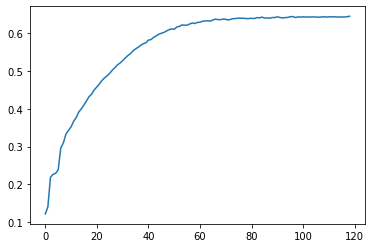

In [71]:
plt.plot(history_male.history['accuracy'])

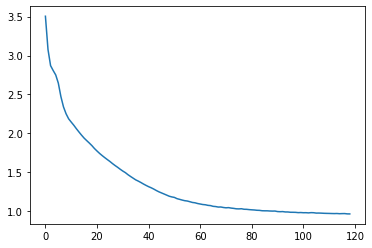

In [72]:
plt.plot(history_male.history['loss'])

##Apply each step to female names

In [73]:
X_female, Y_female = input_f_names[:,:-1], input_f_names[:,-1]

In [74]:
X_female.shape

(46500, 13)

In [75]:
Y_female.shape

(46500,)

In [76]:
Y_female = ku.to_categorical(Y_female, num_classes=vocab_size)
Y_female.shape

(46500, 33)

In [77]:
model_female = Sequential([
                    Embedding(vocab_size, 128, input_length = max_m_name_len - 1),
                    
                    Bidirectional(LSTM(150)),
                    
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    
                    Dense(vocab_size, activation='softmax')
])

model_female.compile(loss='categorical_crossentropy', optimizer= Adam(learning_rate=0.01, decay = 0.001), metrics=['accuracy'])
model_female.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 13, 128)           4224      
_________________________________________________________________
bidirectional_5 (Bidirection (None, 300)               334800    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               38528     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 33)                2145      
Total params: 387,953
Trainable params: 387,953
Non-trainable params: 0
_________________________________________________________________


In [78]:
class femaleCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if logs.get('accuracy') > 0.665:   
          print("\nReached %2.2f%% accuracy, stopping training!" %(logs.get('accuracy')*100))   
          self.model.stop_training = True
          
femaleCallback = femaleCallback()

In [79]:
history_female = model_female.fit(X_female, Y_female, epochs=1000, batch_size = 10000, verbose=1, callbacks = [femaleCallback])

Epoch 1/1000
5/5 [==============================] - 3s 129ms/step - loss: 3.5319 - accuracy: 0.0750
Epoch 2/1000
5/5 [==============================] - 1s 130ms/step - loss: 3.1461 - accuracy: 0.1651
Epoch 3/1000
5/5 [==============================] - 1s 131ms/step - loss: 2.9113 - accuracy: 0.2131
Epoch 4/1000
5/5 [==============================] - 1s 130ms/step - loss: 2.7634 - accuracy: 0.2364
Epoch 5/1000
5/5 [==============================] - 1s 130ms/step - loss: 2.6604 - accuracy: 0.2588
Epoch 6/1000
5/5 [==============================] - 1s 130ms/step - loss: 2.4740 - accuracy: 0.2842
Epoch 7/1000
5/5 [==============================] - 1s 131ms/step - loss: 2.2878 - accuracy: 0.3243
Epoch 8/1000
5/5 [==============================] - 1s 130ms/step - loss: 2.1828 - accuracy: 0.3443
Epoch 9/1000
5/5 [==============================] - 1s 132ms/step - loss: 2.1062 - accuracy: 0.3682
Epoch 10/1000
5/5 [==============================] - 1s 132ms/step - loss: 2.0369 - accuracy: 0.3922

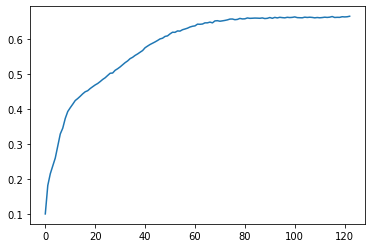

In [80]:
plt.plot(history_female.history['accuracy'])

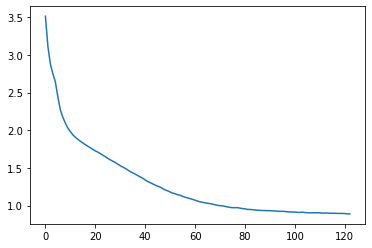

In [81]:
plt.plot(history_female.history['loss'])

In [82]:
def sample(model):

  # Initiate list of indices with random number (letter), this is the list which will contain the list of indices of the characters to generate
  first_letter = np.random.randint(1,33)

  indices = [first_letter]
  
  # idx is the index of the one-hot vector x that is set to 1
  # All other positions in x are zero.
  # We will initialize idx to -1
  idx = -1 
  
  # Loop over time-steps t. At each time-step:
  # sample a character from a probability distribution 
  # and append its index (`idx`) to the list "indices". 
  # We'll stop if we reach 20 characters 
  # (which should be very unlikely with a well trained model).
  # Setting the maximum number of characters helps with debugging and prevents infinite loops

  
  newline_character = char_to_ix['\n']

  counter = 0

  # Azerbaijani names does not start with one of these letters
  if ix_to_char[first_letter] != 'ı' and ix_to_char[first_letter] != 'ğ':
    
    while idx != newline_character and counter != 20:
      token_list = pad_sequences([indices], maxlen=max_m_name_len-1, padding='pre')
      predicted = model.predict(token_list)
      idx = np.random.choice(range(vocab_size), p = predicted.ravel())
      indices.append(idx)
    name =''.join([ix_to_char[i] for i in indices[:-1]])
    

    return name

In [83]:
def generate(model, iter_num = 30):


  while iter_num>0:
    name = sample(model)
    if name != None:
      if name not in m_names and name not in f_names:
        iter_num -= 1
        if name[0] == 'i':
          print('İ' + name[1:])
          
        else:
          print(name.capitalize())

In [84]:
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output

In [85]:
# we will create widgets to make it better to visualize

gender = widgets.Dropdown(options = [None, 'Male', 'Female'], description = 'Gender' )
output = widgets.Output()

number = widgets.BoundedFloatText(
min=1, max=50, value=15, step=1, description = 'Number')

def common(name, number):
  
  with output:
    output.clear_output()

    if name == 'Male':
      generate(model_male, number)
      

    if name == 'Female':
      generate(model_female, number)

def name_eventhandler(change):
    common(change.new, number.value)

def number_eventhandler(change):
    common(gender.value, change.new)


gender.observe(name_eventhandler, names = 'value')
number.observe(number_eventhandler, names = 'value')

#Generating New Names

In [86]:
display(gender)
display(number)

display(output)

Dropdown(description='Gender', options=(None, 'Male', 'Female'), value=None)

BoundedFloatText(value=15.0, description='Number', max=50.0, min=1.0, step=1.0)

Output()